# Matplotlib

In this notebook i will demonstart how to create some of the common visualisations using pandas (for the data) and matplotlib (for the visualisations).

## Python Terminology
A **library** contains reuseable code modules.  We can import these into our projects to perform common tasks without having to write the complex code ouselves.  For example the Matplotlib library contains lots of useful functions that we can use to visualise data.

A **module** is a collection of code that is for a specific task.  Some libaries conatin only a single module, others contain multiple modules for similar tasks.  For example the Matplotlib libarary has a **pyplot** module for visulaing 2d data.


## Project Setup

In [180]:
# import the pandas library so we can use its pre written code to handle our data
import pandas as pd 

# import the pyplot module from the maplotlib library so we can visualise the data in 2d
import matplotlib.pyplot as plt

# import numpy library as it has some useful features for calculating statistics
import numpy as np

## Our Data

We will look at the two common ways of obtaining our data:
1. We can hand write the values in our code like this

In [149]:
# Create a pandas dataframe called our_data with three columns
our_data = pd.DataFrame({'x': [25, 12, 15, 14, 19, 23, 25, 29],
                   'y': [5, 7, 7, 9, 12, 9, 9, 4],
                   'z': [3, 4, 4, 5, 7, 8, 8, 9],
                    'sales': [52, 413, 253, 65, 170, 230, 395, 353],
                    'team':["Team A", "Team A", "Team B", "Team B", "Team B", "Team C", "Team C", "Team C"],
                    'name':["Adam", "Charlie", "Jim", "David", "Millard", "Dan", "Maria", "Anna"]})


# Display our DataFrame
display(our_data)                        

,x,y,z,sales,team,name
0,25,5,3,52,Team A,Adam
1,12,7,4,413,Team A,Charlie
2,15,7,4,253,Team B,Jim
3,14,9,5,65,Team B,David
4,19,12,7,170,Team B,Millard
5,23,9,8,230,Team C,Dan
6,25,9,8,395,Team C,Maria
7,29,4,9,353,Team C,Anna


We can save a Pandas dataframe to a file using to_csv

In [150]:
# Save the dataframe to a csv file called out_data.csv in the same folder as the code
# Index = False stops it from saving the row number in the csv file
our_data.to_csv('our_data.csv', index = False)

2. Alternatively, we could load the data from a file

In [151]:
# Load the data from the file 'our_data.csv' in to a pandas dataframe
# This file must be in the same folder as this code to work
our_data = pd.read_csv('our_data.csv')

# To load a file from a differnt folder you need to add the path
# our_data = pd.read_csv('/folder/other_folder/our_data.csv')

# Display our DataFrame
display(our_data)

,x,y,z,sales,team,name
0,25,5,3,52,Team A,Adam
1,12,7,4,413,Team A,Charlie
2,15,7,4,253,Team B,Jim
3,14,9,5,65,Team B,David
4,19,12,7,170,Team B,Millard
5,23,9,8,230,Team C,Dan
6,25,9,8,395,Team C,Maria
7,29,4,9,353,Team C,Anna


## Visualisations
### ScatterPlot
#### Simple

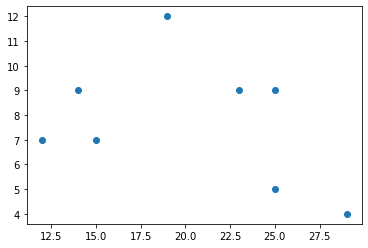

In [152]:
# Create a simple scatter plot of the X and y columns in our dataframe
plt.scatter(our_data.x, our_data.y)
plt.show()

#### Marker size
We can change the size of the marker using the **s** parameter

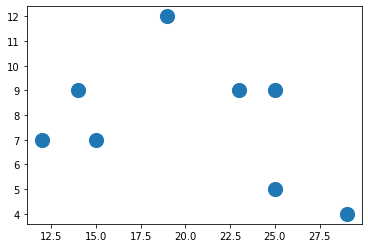

In [153]:
# Change the markers size to 200
plt.scatter(our_data.x, our_data.y, s=200)
plt.show()

#### Variable column size
Set the marker size to a column in our data

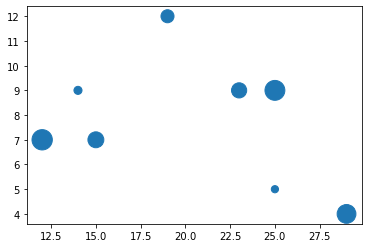

In [154]:
#Use the sales column in our dataframe for the marker size
plt.scatter(our_data.x, our_data.y, s=our_data.sales)
plt.show()

#### Marker colour
Set the colour of the marker using a numeric column in our data.  Matplotlib will create a gradiant based on the values of the column.

The matplotlib site has a [range of colour maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) (cmaps) to chose from depending on whether your data is sequential or qualitive.

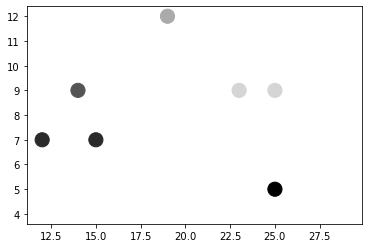

In [155]:
# Use the c parameter to determine the colour of our dots
# use the cmap parameter to determine which colour sclae to use
# Note we have fixed the marker size
plt.scatter(our_data.x, our_data.y, s=200, c=our_data.z, cmap='gray')
plt.show()

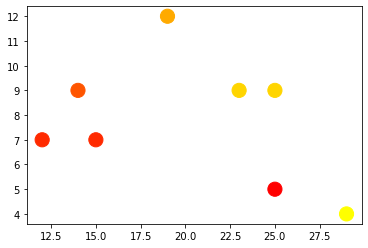

In [156]:
# Use the c parameter to determine the colour of our dots
# use the cmap parameter to determine which colour sclae to use
# Note we have fixed the marker size
plt.scatter(our_data.x, our_data.y, s=200, c=our_data.z, cmap='autumn')
plt.show()

#### Colour by group
In this example we will colour the markers based on the team.

First we need to group our data by teams.  This effectively creates a dataframe for each team.

In [157]:
# get a list of the teams in our team column
groups = our_data.groupby('team')

# If we wanted to view our grouped data we can use this code
for key, item in groups:
    print(groups.get_group(key), "\n\n")

    x  y  z  sales    team     name
0  25  5  3     52  Team A     Adam
1  12  7  4    413  Team A  Charlie 


    x   y  z  sales    team     name
2  15   7  4    253  Team B      Jim
3  14   9  5     65  Team B    David
4  19  12  7    170  Team B  Millard 


    x  y  z  sales    team   name
5  23  9  8    230  Team C    Dan
6  25  9  8    395  Team C  Maria
7  29  4  9    353  Team C   Anna 




We then call the plot function for each of the 3 datasets.  Matplotlib will give each one a different colour.

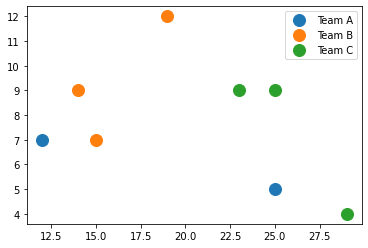

In [158]:
# Loop through each of the teams dataframes
for name, group in groups:
    # Plot that teams markers
    # marker='o' means our markers are circles
    # linestyle='' means our markers are not connected
    # markersize=12 sets the size of the marker
    # label=name sets the name that appears in the legend to the team name
    plt.plot(group.x, group.y, marker='o', linestyle='', markersize=12, label=name)

# Now we have plotted our 3 datasets we tell it to show the legend
# Note you can specify the position of the legend using the loc parameter
# options include 'upper center', 'lower center', 'center left', 'center right'
# 'upper left', 'upper right', 'lower left', 'lower right'
plt.legend(loc = 'best')

# now we ask it to show the plot
plt.show()

#### Adding Titles and axis labels

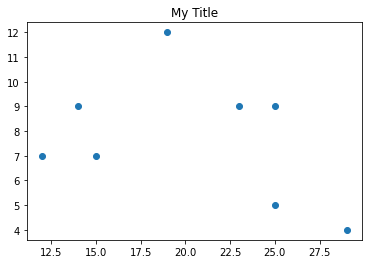

In [159]:
# Create a simple scatter plot of the X and y columns in our dataframe
plt.scatter(our_data.x, our_data.y)

#add title
plt.title('My Title')

# Show the plot
plt.show()

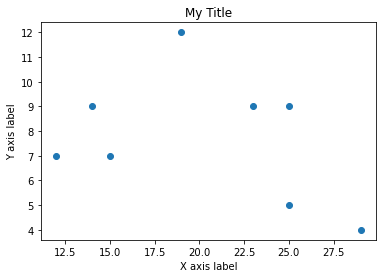

In [177]:
# Create a simple scatter plot of the X and y columns in our dataframe
plt.scatter(our_data.x, our_data.y)

#add title
plt.title('My Title')

# add axis labels
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

# Show the plot
plt.show()

Change the font size of our title

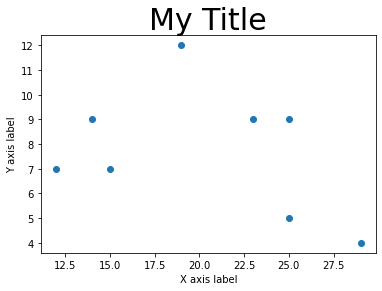

In [178]:
# Create a simple scatter plot of the X and y columns in our dataframe
plt.scatter(our_data.x, our_data.y)

#add title
plt.title('My Title', fontsize=30)

# add axis labels
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

# Show the plot
plt.show()


#### Annotating scatterplots
We can annotate one or more points on our scatter plot

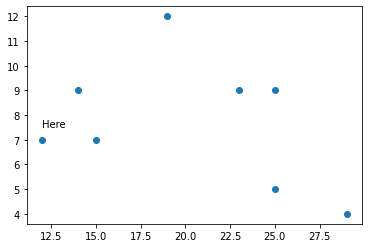

In [161]:
# Create a simple scatter plot of the X and y columns in our dataframe
plt.scatter(our_data.x, our_data.y)

# We will add text above the marker at x=12 y=7
# We will add 0.5 to the y position of the marker
# so our text sits above rather than on the marker
# we will add the text 'here'
plt.text(12, 7.5, 'Here')

# Show the plot
plt.show()

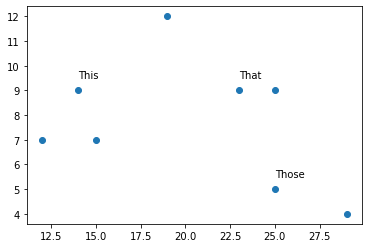

In [162]:
# Create a simple scatter plot of the X and y columns in our dataframe
plt.scatter(our_data.x, our_data.y)

# annotate multiple markers with text
plt.text(14, 9.5, 'This')
plt.text(23, 9.5, 'That')
plt.text(25, 5.5, 'Those')

# Show the plot
plt.show()

#### Annotate using labels in our data

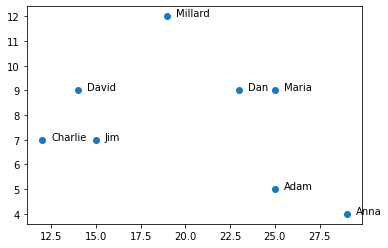

In [175]:
# Create a simple scatter plot of the X and y columns in our dataframe
plt.scatter(our_data.x, our_data.y)

# Annotate all points using a label from our dataset

# Get a list of all the names from the name column in our dataset
our_labels=list(our_data.name)

# Loop through each name in the list
# i is a counter starting at zero increasing for each name
# We use it to find the coordinates for each point so
# we know where to put our text
for i, txt in enumerate(our_labels):
    # add an annotation for this name
    # Add it at the relevant x and y cordinates for the name
    # we will add 0.5 to the x cordinate of the point
    # so our text appears to the right of the point
    plt.annotate(txt, (our_data.x[i] + 0.5, our_data.y[i]))

#Show the plot
plt.show()

#### Add Average lines
We can add additional lines to our plot, for example to show where the average values are.

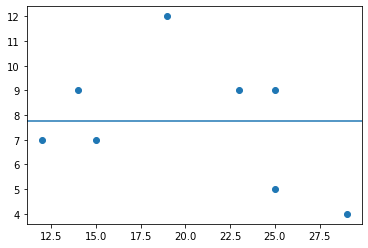

In [179]:
# Create a simple scatter plot of the X and y columns in our dataframe
plt.scatter(our_data.x, our_data.y)

# add a  horizontal line at mean value of y
# We will use the np.nanmean function to calculate the mean
plt.axhline(y=np.nanmean(df.y))

#Show the plot
plt.show()

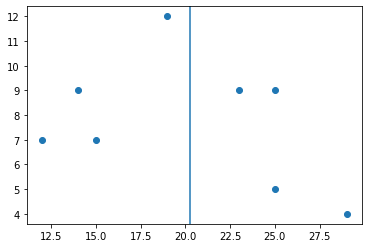

In [184]:
# Create a simple scatter plot of the X and y columns in our dataframe
plt.scatter(our_data.x, our_data.y)

# add vertical line at mean value of X
# We will use the np.nanmean function to calculate the mean
plt.axvline(x=np.nanmean(our_data.x))

#Show the plot
plt.show()

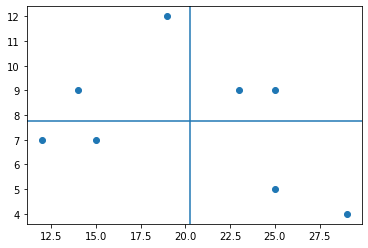

In [185]:
# Create a simple scatter plot of the X and y columns in our dataframe
plt.scatter(our_data.x, our_data.y)

# add vertical line at mean value of X
plt.axvline(x=np.nanmean(our_data.x))

#add horizontal line at mean value of y
plt.axhline(y=np.nanmean(df.y))

#Show the plot
plt.show()

We can also use additional parameters to change the colour, style, width and label of the lines

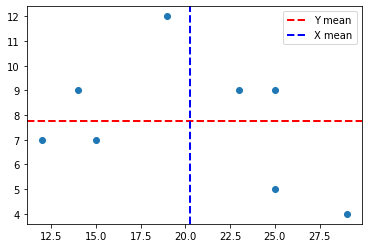

In [189]:
# Create a simple scatter plot of the X and y columns in our dataframe
plt.scatter(our_data.x, our_data.y)

# plot dotted lines with 
plt.axhline(y=np.nanmean(our_data.y), color='red', linestyle='--', linewidth=2, label='Y mean')
plt.axvline(x=np.nanmean(our_data.x), color='blue', linestyle='--', linewidth=2, label='X mean')

# Show the legend so we can see our line labels
plt.legend()

#Show the plot
plt.show()

#### Saving a plot to a file
We can save a plot to a file so we can use it in reports etc.

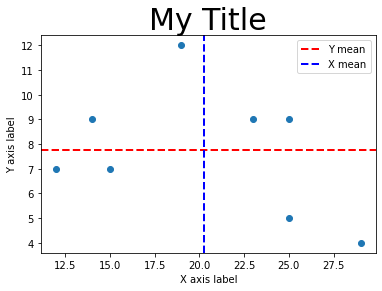

<Figure size 432x288 with 0 Axes>

In [202]:
# First we create the plot
plt.scatter(our_data.x, our_data.y)

# add mean lines
plt.axhline(y=np.nanmean(our_data.y), color='red', linestyle='--', linewidth=2, label='Y mean')
plt.axvline(x=np.nanmean(our_data.x), color='blue', linestyle='--', linewidth=2, label='X mean')

#add title
plt.title('My Title', fontsize=30)

# add axis labels
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

# Show Legend
plt.legend()

# note we don't call plt.show()
# instead we save it with the name 'my_plot.png'
plt.savefig('my_plot.png')

# If you wanted to save it with a transparent background
#plt.savefig('my_plot.png', transparent=True)